# DATA 620 Project 1

## Authors: John Mazon, LeTicia Cancel, Bharani Nittala

### Introduction

For this project we were asked to:
1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

### Hypothesis:

Our dataset consists of tv shows and moves available on Netflix as of 2019 from Kaggle https://www.kaggle.com/shivamb/netflix-shows. The dataset can be leveraged to measure degree centrality by the nodes such as TV shows and Movies. It will be interesting to see how the data differs between movies and tv shows created in the United States and content created outside of the US. 

**Import libraries**

In [90]:
import pandas as pd
import networkx as nx
from numpy.random import seed
from scipy.stats import t, sem
from scipy import stats
from math import sqrt
from numpy import mean
import numpy as np
#np.random.seed(12345678)

**Load Netflix Data** 

The data is imported from the csv file stored on GitHub. The data consists of all TV Shows and Movies available on Netflix. We will use the data points release_year and rating in our analysis. 

In [2]:
data = pd.read_csv("https://github.com/ltcancel/DATA620/raw/main/Project1/netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Filter Data** 

We filtered the data into 2 categorical groups, Domestic vs International. 

In [4]:
df_domestic = data[data['country'] == 'United States']
df_inter = data[data['country'] != 'United States']

In [5]:
df_domestic.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


In [6]:
df_inter.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


**Graphs** 

The first graph will be for the Domestic movies and tv shows. The graphs are very similar in shape but the International graph is a bit more clustered in the centered when compared to the Domestic graph. 

In [7]:
#g = nx.from_pandas_edgelist(data, 'release_year', 'rating')
g_dom = nx.from_pandas_edgelist(df_domestic, 'release_year', 'rating')

In [8]:
print('Edges and Nodes for Domestic')
print('Number of nodes of the graph: ',g_dom.order())
print('Number of edges of the graph: ',g_dom.size())

Edges and Nodes for Domestic
Number of nodes of the graph:  82
Number of edges of the graph:  307


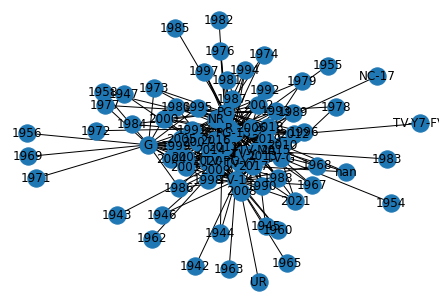

In [9]:
nx.draw(g_dom, with_labels=True)

The second graph will be for the International movies and tv shows

In [10]:
g_inter = nx.from_pandas_edgelist(df_inter, 'release_year', 'rating')

In [11]:
print('Edges and Nodes for International')
print('Number of nodes of the graph: ',g_inter.order())
print('Number of edges of the graph: ',g_inter.size())

Edges and Nodes for International
Number of nodes of the graph:  83
Number of edges of the graph:  345


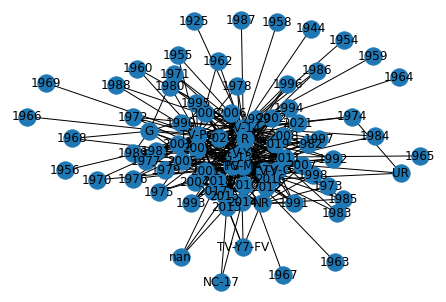

In [12]:
nx.draw(g_inter, with_labels=True)

Now we will calculate the centrality measures for both subsets of data and compare. The rating R has the highest centrality scores in the Domestic dataset while TV-MA has the highest scores in the International dataset. 

1. **Eigenvector:** The R rating value is very close the the TV-MA value, 0.2875 and 0.2813 respectively. 
2. **Degree:** The degreee in the International dataset is higher than the Domestic dataset, 0.560976 vs 0.506173.
3. **Betweenness:** The values for the International dataset exceed the Domestic dataset, 0.161084 vs 0.158999.
4. **Closeness:** The values for the International dataset also exceed the Domestic dataset, 0.585714 vs 0.551020.

In [13]:
#Domestic data
eig = nx.eigenvector_centrality(g_dom).values()
cent = nx.degree_centrality(g_dom).values()
btw_cent = nx.betweenness_centrality(g_dom).values()
close_cent = nx.closeness_centrality(g_dom).values()

In [14]:
data_tuples = list(zip(eig, cent, btw_cent, close_cent))
dom_table = pd.DataFrame(data_tuples, columns=['Eigenvector','Degree','Betweenness','Closeness'])
dom_table.index = list(g_dom)
dom_table.head()

,Eigenvector,Degree,Betweenness,Closeness
2009,0.140577,0.111111,0.015242,0.509434
PG-13,0.275616,0.456790,0.115975,0.522581
2008,0.130076,0.111111,0.032544,0.479290
1997,0.058125,0.037037,0.000543,0.395122
R,0.287520,0.506173,0.158999,0.551020


In [15]:
#International data
eig = nx.eigenvector_centrality(g_inter).values()
cent = nx.degree_centrality(g_inter).values()
btw_cent = nx.betweenness_centrality(g_inter).values()
close_cent = nx.closeness_centrality(g_inter).values()

In [16]:
data_tuples = list(zip(eig, cent, btw_cent, close_cent))
inter_table = pd.DataFrame(data_tuples, columns=['Eigenvector','Degree','Betweenness','Closeness'])
inter_table.index = list(g_inter)
inter_table.head()

,Eigenvector,Degree,Betweenness,Closeness
2020,0.133162,0.121951,0.010154,0.515723
TV-MA,0.281351,0.560976,0.161084,0.585714
2016,0.144996,0.158537,0.028691,0.535948
2011,0.138132,0.121951,0.007419,0.515723
R,0.251836,0.463415,0.081768,0.525641


When we compare the max value for each column for both tables we see that the R rating has the highest values for most of the centrality measures in the Domestic dataset. Even though we looked at the values for TV-MA in the previous chart, the rating TV-14 actaully has the highest overall values for all centrality measures. 

In [39]:
print('Max values for Domestic')
print(dom_table.idxmax())
print(dom_table.max())

Max values for Domestic
Eigenvector     R
Degree          R
Betweenness    PG
Closeness       R
dtype: object
Eigenvector    0.287520
Degree         0.506173
Betweenness    0.194085
Closeness      0.551020
dtype: float64


In [38]:
print('Max values for International')
print(inter_table.idxmax())
print(inter_table.max())

Max values for International
Eigenvector    TV-14
Degree         TV-14
Betweenness    TV-14
Closeness      TV-14
dtype: object
Eigenvector    0.308236
Degree         0.719512
Betweenness    0.374646
Closeness      0.719298
dtype: float64


**Statistical Analysis** 

We created a funtion that accepts the Domestic and International data and performs a statistical analysis. The function returns the T-Score (t_stat), Degrees of Freedom (df), Critical Values (cv), and the p-values (p). 

In [108]:
def independent_ttest(dom_table, inter_table, alpha):
    #calculate mean
    mean_dom, mean_inter = mean(dom_table), mean(inter_table)

    # number of paired samples
    n1, n2 = len(dom_table), len(inter_table)

    # sum of squared differences between observations
    d1 = (dom_table.sum() - inter_table.sum())**2

    # sum difference between observations
    d2 = dom_table.sum() - inter_table.sum()

    #calculate standard deviation
    std_dom, std_inter = dom_table.std(), inter_table.mean()

    #standard error
    se_dom, se_inter = dom_table.sem(), inter_table.sem()

    #standard error on the difference between the samples
    sed = np.sqrt(se_dom**2 + se_inter**2)

    #calculate t-score
    t_stat = (mean_dom - mean_inter) / sed

    #degrees of freedom
    df = n1 + n2 -2

    #critical value
    alpha = 0.05
    cv = t.ppf(1.0 - alpha, df)

    #calculate p values
    p = (1 - t.cdf(abs(t_stat), df)) * 2
    
    return t_stat, df, cv, p

In [109]:
independent_ttest(dom_table, inter_table, 0.05)

(Eigenvector   -0.153560
 Degree        -0.469017
 Betweenness    0.462256
 Closeness     -4.070078
 dtype: float64,
 163,
 1.6542555849119323,
 array([8.78146825e-01, 6.39684413e-01, 6.44514085e-01, 7.31007956e-05]))

### Resources

T-Score Formulas: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f